
# Final DBM Project:  Food Nutrition per Dollar

## Project description

We would like to improve our nutrition in a smart way, so we will have a relational database with the information about different foods, their nutrition properties, where they are sold and their price. 

## Questions

1. What food has the best rank?

2. What units of food can you get for under $3?

3. What food is sold in Lyon?

4. Calories of the food sold by Lidl?

## Entities

The first entity that comes to mind is for the food. We need to record every food in order to know its attributes. 

Then, we have to know where this food is sold so that we know where it can be found and what price it has. 

We suppose that each seller will sell types of food (e.g., Lidl will sell vegetables, dairy, etc.) and not specific foods. That's why we need an entity of food types. 

Knowing the nutrition values for each food, we will be able to know its (unique) rank. These values will be stored in a new entity.

Each seller will set a price for the food they sell, so we will have a table with different prices used and the units in which food is sold. This will also affect the rank. 

Finally, we have to know the nutrition values for each food, but since the attributes only depend on the matching food, it will be a weak entity. 

- Food
- Seller
- Food Group
- Nutrition Per $
- Average Price
- Nutrition (weak)

### Relations between entities

1. Food \<Member of\> Food Group → N:1 
  
  One food group has many food but every food only belongs to one food group.

1. Food \<Costs\> Average Price → 1:1 

  Each food has its price and its price belongs to its food (but price is set by seller, so it is not a weak entity)

1. Seller \<Sells\> Food Group → N:N

  One seller can sell more than one food group, and one food group can be sold by many sellers. 

1. Seller \<Sets\> Average Price → N:N

  One seller sets prices, and one price is used by many sellers. 

1. Nutrition Per \$ \<Determined by\> Average Price → 1:1

  Each price will determine the rank, and the rank is determined by one price.

1. Food \<Has\> Nutrition Per \$ → 1:1

  Each food has its own rank, which depends on different factors, and each rank only corresponds to one food. 

1. Food \<Contains\> Nutrition → 1:1 

  Each food has its own nuytrition values, which are not independent (weak entity) 

## Schema

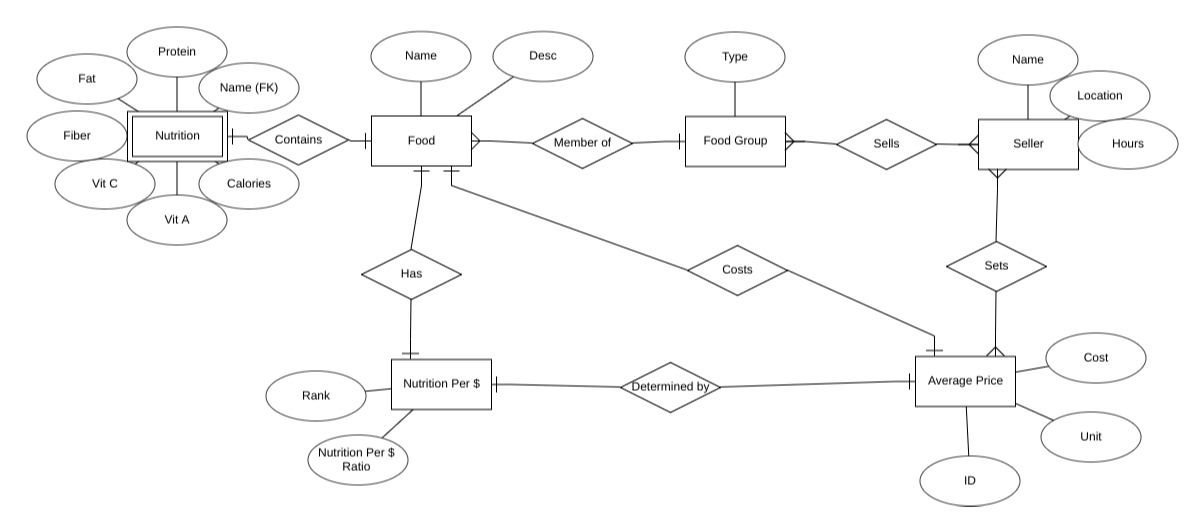

## ER Modeling

Each entity will have the attributes shown on the schema, but also the foreign keys extracted from the relations between entities:

- Relation 1 (N:1) → add type in food

- Relation 2 (1:1) → add price ID in food

- Relation 3 (N:N) → create new entity 'sells' with foreign keys primary keys

- Relation 4 (N:N) → create new entity 'sets' with foreign keys primary keys

- Relation 5 (1:1) → add price ID in nutrition_per_dollar

- Relation 6 (1:1) → add food name in nutrition_per_dollar

- Relation 7 (1:1) → primary key of nutrition is food name

food(<u>f_name</u>, desc, #type, #p_ID)

food_group(<u>type</u>)

seller(<u>s_name</u>, location, hours)

nutrition_per_\$(<u>rank</u>, nutrition_per_$_ratio, #p_ID, #f_name)

average_price(<u>p_ID</u>, cost, unit)

nutrition(<u>#f_name</u>, protein, fat, fiber, vit_a, vit_c, calories)

sells(<u>#type</u>, <u>#s_name</u>)

sets(<u>#s_name</u>, <u>#p_ID</u>)


## Translation into relational algebra

1. $\prod_{f\_name, rank}(\sigma_{rank=1}(nutrition\_per\_dollar))$

2. $\prod_{unit}(\sigma_{cost<3}(average\_price))$

3. $\prod_{f\_name}(food \Join \prod_{type}(sells\Join\sigma_{location='Lyon'}(seller)) )$

4. $\prod_{calories}(nutrition \Join \prod_{f\_name}(food\Join \prod_{type}(\sigma_{s\_name='Lidl'}(sells))))$

## Translation into SQL language

1. SELECT f_name, rank

  FROM nutrition_per_dollar
  
  WHERE rank = 1

2. SELECT unit
  
  FROM average\_price

  WHERE cost < 3

3. SELECT f\_name 

  FROM food 

  WHERE type IN (*)

  \* → SELECT sells.type
  
  FROM sells 

  JOIN seller

  ON sells.s\_name = seller.s\_name

  WHERE location='Lyon'

4. SELECT calories

  FROM nutrition 

  WHERE f\_name IN (*)

  \* → SELECT f\_name

  FROM food

  JOIN sells

  ON food.type = sells.type

  WHERE s\_name = 'Lidl'

**Results**: 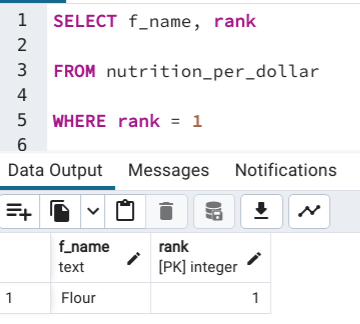

**What food has the best rank? **

We found that flour had the most nutrients per dollar. Flour is a grain, which are cheap to mass produce, it is subsidized in many countries and is often fortified with aditional vitamins and minerals due to it's importance in the western diet. 

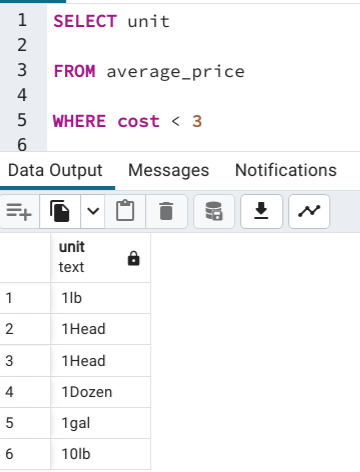

**What units of food can you get for under $3?**

We found that lb bags, heads of greens, egg cartons, and gallons of dairy were all availible for under $3, offering good examples of affordable bulk goods. 


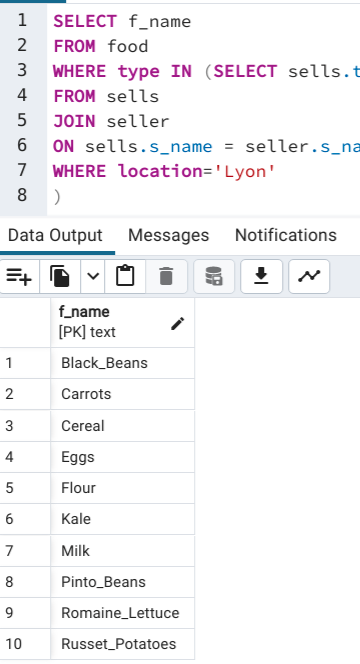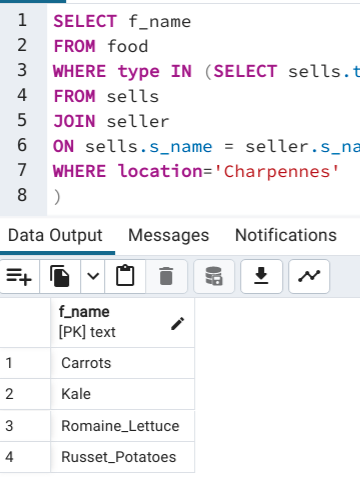

**What food is sold in Lyon? What food is sold in Charpennes?**

Not every store stocks all food. In particular, the Marche des Charpennes farmer's markets sells only produce. This is important to determine what food is availible within walking distance. 

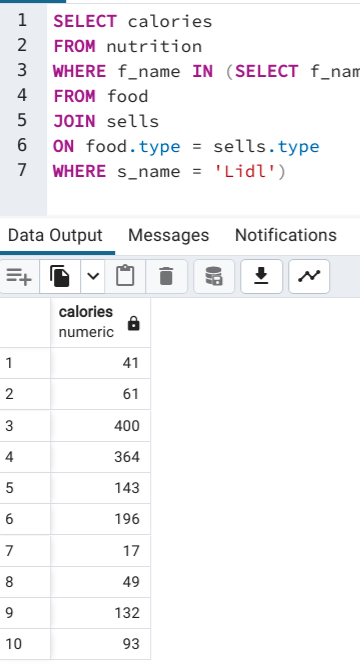

**Calories of the food sold by Lidl?**

Consummers may be looking for high calorie foods or low calorie foods. This querry shows that a variety of both are availible at Lidl.